<a href="https://colab.research.google.com/github/MLcmore2023/MLcmore2023/blob/main/day6_am_morning/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)
Principal Component Analysis is an unsupervised dimensionality reduction technique used to transform a high-dimensional dataset into a lower-dimensional space while retaining the most important patterns and variations in the data. The algorithm identifies orthogonal axes, known as principal components, that capture the maximum variance in the data. These components are ordered by their significance, with the first component explaining the most variance and subsequent components explaining the remaining variance in decreasing order. By projecting the data onto the selected principal components, PCA effectively reduces its dimensionality (number of features), making it easier to visualize and analyze while preserving essential information.






### Import libraries and initialize random generator

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # graphing
np.random.seed(0)

### Read data from CSV
We will use the wholesale customers dataset. The data set includes the annual spending amount on 8 product categories of 440 customers. We will try to group these customers into different clusters, which in real life may represent groups such as individual buyers, business owners, tourists ... (these are just examples)

https://archive.ics.uci.edu/dataset/292/wholesale+customers

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv")
display(dataset)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Channel and Region are categorical variables, so these feature are not suitable for PCA. We will therefore remove them

In [3]:
dataset = dataset.drop(['Channel', 'Region'], axis=1)

We have a total of 440 data samples, and 6 features

In [4]:
print(dataset.shape)
n_samples = dataset.shape[0]
n_features = dataset.shape[1]

(440, 6)


In [5]:
# Convert the dataset into a numpy matrix
X = dataset.to_numpy()
display(X)

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

### Standardizing dataset values
We can standardize features by removing the mean and scaling to unit variance, so all features are treated equally.

In [6]:
def mean(x):
    return sum(x)/len(x)

def std(x):
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

dataset_standardized = ( X - mean(X) )  /  std(X)
display(dataset_standardized)

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

### Covariance matrix

The covariance matrix shows the relationships between variables in a dataset by measuring how two variables vary together. It is a square matrix where each element represents the covariance between two variables.

Let's assume we have a dataset with $n$ observations and $m$ variables. The covariance matrix, denoted as $\mathbf{C}$, is an $m \times m$ matrix, where the $(i,j)$th element represents the covariance between variables $X_i$ and $X_j$:

$$
\mathbf{C} = \begin{bmatrix}
\text{cov}(X_1, X_1) & \text{cov}(X_1, X_2) & \dots & \text{cov}(X_1, X_m) \\
\text{cov}(X_2, X_1) & \text{cov}(X_2, X_2) & \dots & \text{cov}(X_2, X_m) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_m, X_1) & \text{cov}(X_m, X_2) & \dots & \text{cov}(X_m, X_m) \\
\end{bmatrix}
$$

The diagonal elements of the covariance matrix ($C_{ii}$) represent the variance of each variable, and the off-diagonal elements ($C_{ij}$ where $i \neq j$) represent the covariances between different pairs of variables.

The covariance between two variables, $X_i$ and $X_j$, is given by the following formula:

$$
\text{cov}(X_i, X_j) = \frac{1}{n-1} \sum_{k=1}^{n} (X_{ki} - \bar{X}_i) \cdot (X_{kj} - \bar{X}_j)
$$

Where:
- $X_{ki}$ and $X_{kj}$ are the values of variable $X_i$ and $X_j$ for the $k$th observation, respectively.
- $\bar{X}_i$ and $\bar{X}_j$ are the means of variables $X_i$ and $X_j$ across all observations.

The matrix can be computed using the following:
$$\mathbf{C} = \frac{X^T \cdot X}{n-1}$$

In [7]:
def covariance(x):
    n = x.shape[0]
    return (x.T @ x)/(n-1)

cov_mat = covariance(dataset_standardized)

### Finding eigenvectors and eigenvalues of the covariance matrix (eigendecomposition of covariance matrix)
Eigendecomposition of the covariance matrix involves finding the eigenvectors and eigenvalues of the covariance matrix. By decomposing the covariance matrix, we can identify the principal components of the data, which are the directions of maximum variance. Eigenvectors are the directions along which the data varies the most, and eigenvalues indicate the variance along those directions.

For example:

<img src="https://programmathically.com/wp-content/uploads/2021/08/pca-2-dimensions.png" width=50%>

By computing the eigenvectors and eigenvalues of the covariance matrix, we can later reduce its dimensionality and simplify subsequent analyses

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.65099857 1.70646229 0.74175057 0.56501435 0.06311455 0.28632709]
Eigenvectors 
 [[-0.04288396 -0.52793212 -0.81225657 -0.23668559  0.03602539  0.04868278]
 [-0.54511832 -0.08316765  0.06038798 -0.08718991  0.03804019 -0.82657929]
 [-0.57925635  0.14608818 -0.10838401  0.10598745 -0.72174458  0.31499943]
 [-0.05118859 -0.61127764  0.17838615  0.76868266  0.01563715  0.02793224]
 [-0.5486402   0.25523316 -0.13619225  0.17174406  0.68589373  0.33964012]
 [-0.24868198 -0.50420705  0.52390412 -0.55206472  0.07513412  0.31470051]]


### Sorting the eigenvectors and eigenvalues
Here, we sort eigenvalues in descending order, from highest variance to lowest variance.

In [9]:
eig_pairs = [] # Create an empty list to store the eigenvalue-eigenvector pairs

# Loop through the eigenvalues and eigenvectors
for i in range(len(eig_vals)):
    eigenvalue_magnitude = np.abs(eig_vals[i])     # Get the absolute value of the eigenvalue
    eigenvector = eig_vecs[i, :]     # Get the corresponding eigenvector
    eig_pairs.append(  [eigenvalue_magnitude, eigenvector]  )

eig_pairs.sort(reverse=True)

for e in eig_pairs:
  print(e)

[2.6509985696168084, array([-0.04288396, -0.52793212, -0.81225657, -0.23668559,  0.03602539,
        0.04868278])]
[1.7064622949947312, array([-0.54511832, -0.08316765,  0.06038798, -0.08718991,  0.03804019,
       -0.82657929])]
[0.7417505705584576, array([-0.57925635,  0.14608818, -0.10838401,  0.10598745, -0.72174458,
        0.31499943])]
[0.5650143486980587, array([-0.05118859, -0.61127764,  0.17838615,  0.76868266,  0.01563715,
        0.02793224])]
[0.2863270874218252, array([-0.24868198, -0.50420705,  0.52390412, -0.55206472,  0.07513412,
        0.31470051])]
[0.06311455467822623, array([-0.5486402 ,  0.25523316, -0.13619225,  0.17174406,  0.68589373,
        0.33964012])]


In [10]:
# Create separate lists for eigenvalues and eigenvectors
eig_vals_sorted = []
eig_vecs_sorted = []

# Extract eigenvalues and eigenvectors from the sorted pairs
for pair in eig_pairs:
    eig_vals_sorted.append(pair[0])
    eig_vecs_sorted.append(pair[1])

# Convert the lists back to numpy arrays
eig_vals_sorted = np.array(eig_vals_sorted)
eig_vecs_sorted = np.array(eig_vecs_sorted)

### Explained variance
We can graph out the explained variance of each principle component.

Explained variance: [44.08289288 28.37639953 12.3344129   9.39550375  4.7612724   1.04951854]


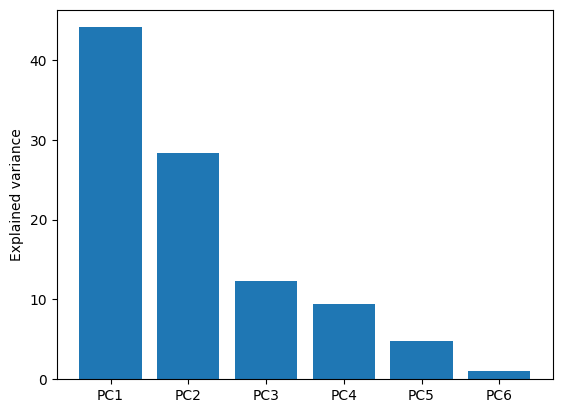

In [11]:
eig_vals_total = sum(eig_vals)
# convert the eigenvalues to percentage of the total sum of all eigenvalues
explained_variance = eig_vals_sorted/eig_vals_total * 100

print('Explained variance:',explained_variance)

plt.bar(['PC1','PC2','PC3','PC4','PC5','PC6'],explained_variance)
plt.ylabel('Explained variance')

we now graph out the cumulative explained variance of the 8 principal components. From the graph, we can see that just 3 principal components accounts for 72% of the explained variance.

Cumulative explained variance: [ 44.08289288  72.45929241  84.7937053   94.18920906  98.95048146
 100.        ]


Text(0, 0.5, 'Cumulative explained variance')

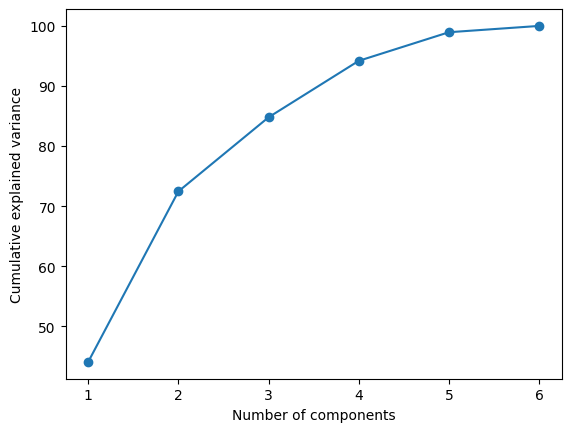

In [12]:
cumulative_explained_variance = np.cumsum(explained_variance)
print('Cumulative explained variance:',cumulative_explained_variance)

plt.plot([1,2,3,4,5,6], cumulative_explained_variance, '-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Dimension reduction
We choose the top k eigenvectors where  k is the number of dimensions of the new feature subspace to reduce the dimension (number of features) in our dataset. We will choose just the top 2 so we can visualize it later on a 2D graph.

In [13]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W)

[[-0.04288396 -0.52793212 -0.81225657 -0.23668559  0.03602539  0.04868278]
 [-0.54511832 -0.08316765  0.06038798 -0.08718991  0.03804019 -0.82657929]]


### Project the dataset
With the transformation matrix, we can now transform the dataset using the projection matrix  W to obtain a k-dimensional feature subspace.

In [14]:
X_proj = dataset_standardized.dot(W.T)
print(X_proj.shape)

(440, 2)


### Visualization of the projection

Text(0.5, 1.0, '2 components, captures 72% of total variation')

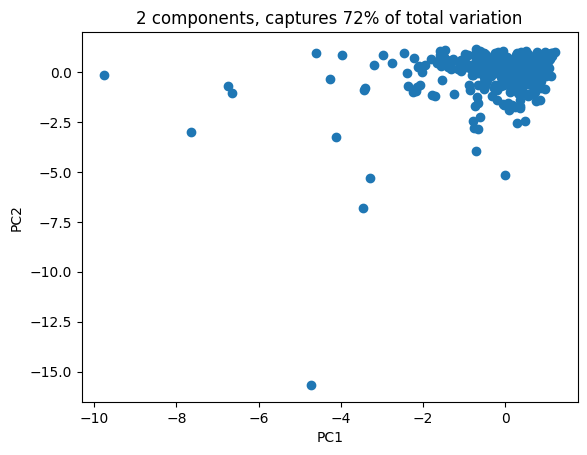

In [15]:
plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'2 components, captures {int(cumulative_explained_variance[1])}% of total variation')

### Silhouette Score
The silhouette score is a measure of how well-defined the clusters are in a clustering algorithm. It quantifies how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to +1, where a higher value indicates better-defined clusters.

$$ \text{Silhouette Score} = \frac{{\sum_{i=1}^{N} (b_i - a_i)}}{{\max(a_i, b_i)}}
$$

- $N$ is the number of data points,
- $a_i$ is the average distance of data point $i$ to other points within the same cluster,
- $b_i$ is the average distance of data point $i$ to the points in the nearest neighboring cluster.

 Higher scores indicate better clustering results, while negative scores imply that data points may have been assigned to the wrong clusters.

In [16]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def pairwise_distances(dataset):
    num_points = len(dataset)
    distances = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i + 1, num_points):
            distances[i, j] = euclidean_distance(dataset[i], dataset[j])
            distances[j, i] = distances[i, j]
    return distances

def silhouette_score(dataset, cluster_labels):
    distances = pairwise_distances(dataset)
    num_points = len(dataset)
    silhouette_scores = np.zeros(num_points)

    for i in range(num_points):
        a_i = np.mean([distances[i, j] for j in range(num_points) if cluster_labels[j] == cluster_labels[i]])

        b_i = float('inf')
        for cluster in set(cluster_labels):
            if cluster != cluster_labels[i]:
                b_i_temp = np.mean([distances[i, j] for j in range(num_points) if cluster_labels[j] == cluster])
                b_i = min(b_i, b_i_temp)

        silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) != 0 else 0

    return np.mean(silhouette_scores)

### Comparison of clustering (before vs. after PCA)
We will run K-means clustering on the dataset before and after the PCA pre-processing. We can see that the Silhouette Score increased after using PCA, so PCA has improved the result.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(dataset_standardized)

# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Get the Silhouette Score
silhouette_avg = silhouette_score(dataset_standardized, cluster_labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5432017726264434


In [20]:
k = 3
W = eig_vecs_sorted[:k, :] # Projection matrix
dataset_proj = dataset_standardized.dot(W.T)


kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(dataset_proj)

# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Get the Silhouette Score
silhouette_avg = silhouette_score(dataset_proj, cluster_labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6210407161799368


we can see here that the silhouette score increased when we applied PCA, meaning the clustering improved.

### Exercise
1. If we want to keep at least 90% of the explained variance in our dataset, how many Principal Components do we need to keep? (see the graphs above)
2. Is it possible for one variable to have 100% explained variance, and all other variables to have 0% explained variance? If so, what does it mean? What should the code do?
3. Write code to project the dataset using 4 principal components.

## References
- https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/
- https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
- https://www.youtube.com/watch?v=FgakZw6K1QQ
- https://www.kaggle.com/code/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering
- https://www.kaggle.com/code/kashnitsky/a7-demo-unsupervised-learning/notebook